In [41]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [42]:
df = pd.read_csv('subway_delay-winter-2019.csv')

In [43]:
df['datetime'] = df['Report Date'] + ' ' + df['Time']

In [44]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report Date  4376 non-null   object        
 1   Route        4366 non-null   object        
 2   Time         4376 non-null   object        
 3   Day          4376 non-null   object        
 4   Location     4376 non-null   object        
 5   Incident     4376 non-null   object        
 6   Delay        4376 non-null   int64         
 7   Gap          4376 non-null   int64         
 8   Directoin    3318 non-null   object        
 9   Vehicle      4376 non-null   int64         
 10  datetime     4376 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 376.2+ KB


In [46]:
df = df[(df['datetime'] >'2019-11-27') & (df['datetime'] < '2020-01-05')]

In [47]:
df['dow'] = df['datetime'].dt.weekday

In [48]:
df['hour'] = df['datetime'].dt.hour

In [49]:
df['minute'] = df['datetime'].dt.minute

In [50]:
df[df['datetime'].dt.date.astype(str) == '2019-12-02'].sort_values(by = 'Delay', ascending = False)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1493,2019-12-02,BD,06:59,Monday,DUNDAS WEST STATION,MUPLB,176,180,W,5030,2019-12-02 06:59:00,0,6,59
1494,2019-12-02,BD,09:31,Monday,CHESTER STATION,MUPLB,21,23,W,5298,2019-12-02 09:31:00,0,9,31
1495,2019-12-02,BD,22:48,Monday,SHERBOURNE STATION,SUAP,16,21,E,5207,2019-12-02 22:48:00,0,22,48
1496,2019-12-02,BD,00:13,Monday,YORK UNIVERSITY STATIO,MUATC,13,17,N,6056,2019-12-02 00:13:00,0,0,13
1497,2019-12-02,BD,08:35,Monday,CHESTER STATION,MUPLB,11,13,W,5258,2019-12-02 08:35:00,0,8,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,2019-12-02,YU,07:54,Monday,SPADINA YUS STATION,MUATC,0,0,N,5391,2019-12-02 07:54:00,0,7,54
1540,2019-12-02,YU,08:59,Monday,YORKDALE STATION,SUAP,0,0,S,5856,2019-12-02 08:59:00,0,8,59
1541,2019-12-02,YU,09:00,Monday,LAWRENCE STATION,MUPAA,0,0,S,5976,2019-12-02 09:00:00,0,9,0
1542,2019-12-02,BD,09:09,Monday,YONGE BD STATION,MUIR,0,0,W,5212,2019-12-02 09:09:00,0,9,9


In [51]:
df[df['Incident'] == 'General Delay']

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute


In [52]:
df[df['Gap']/df['Delay'] == 2]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1263,2019-11-27,SRT,14:43,Wednesday,MCCOWAN STATION,MRO,5,10,S,0,2019-11-27 14:43:00,2,14,43
1264,2019-11-27,SHP,16:09,Wednesday,BAYVIEW STATION,TUS,5,10,W,0,2019-11-27 16:09:00,2,16,9
1265,2019-11-27,SHP,16:35,Wednesday,DON MILLS STATION,TUS,5,10,W,0,2019-11-27 16:35:00,2,16,35
1276,2019-11-27,BD,12:06,Wednesday,KENNEDY BD STATION,EUBK,3,6,W,5057,2019-11-27 12:06:00,2,12,6
1277,2019-11-27,YU,13:30,Wednesday,DUPONT STATION,TUO,3,6,N,6106,2019-11-27 13:30:00,2,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,2020-01-04,BD,19:49,Saturday,KIPLING STATION,MUI,5,10,E,5333,2020-01-04 19:49:00,5,19,49
3149,2020-01-04,YU,20:47,Saturday,VAUGHAN MC STATION,MUNOA,5,10,NaN,5481,2020-01-04 20:47:00,5,20,47
3150,2020-01-04,SHP,23:45,Saturday,YONGE SHEP STATION,MUNOA,5,10,E,6191,2020-01-04 23:45:00,5,23,45
3153,2020-01-04,BD,15:34,Saturday,HIGH PARK STATION,SUO,4,8,W,5016,2020-01-04 15:34:00,5,15,34


In [53]:
df[df['Gap']%df['Delay'] == 0]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1263,2019-11-27,SRT,14:43,Wednesday,MCCOWAN STATION,MRO,5,10,S,0,2019-11-27 14:43:00,2,14,43
1264,2019-11-27,SHP,16:09,Wednesday,BAYVIEW STATION,TUS,5,10,W,0,2019-11-27 16:09:00,2,16,9
1265,2019-11-27,SHP,16:35,Wednesday,DON MILLS STATION,TUS,5,10,W,0,2019-11-27 16:35:00,2,16,35
1276,2019-11-27,BD,12:06,Wednesday,KENNEDY BD STATION,EUBK,3,6,W,5057,2019-11-27 12:06:00,2,12,6
1277,2019-11-27,YU,13:30,Wednesday,DUPONT STATION,TUO,3,6,N,6106,2019-11-27 13:30:00,2,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,2020-01-04,BD,19:49,Saturday,KIPLING STATION,MUI,5,10,E,5333,2020-01-04 19:49:00,5,19,49
3149,2020-01-04,YU,20:47,Saturday,VAUGHAN MC STATION,MUNOA,5,10,NaN,5481,2020-01-04 20:47:00,5,20,47
3150,2020-01-04,SHP,23:45,Saturday,YONGE SHEP STATION,MUNOA,5,10,E,6191,2020-01-04 23:45:00,5,23,45
3153,2020-01-04,BD,15:34,Saturday,HIGH PARK STATION,SUO,4,8,W,5016,2020-01-04 15:34:00,5,15,34


In [54]:
df.sort_values(by = 'Delay', ascending = False).head(20)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1493,2019-12-02,BD,06:59,Monday,DUNDAS WEST STATION,MUPLB,176,180,W,5030,2019-12-02 06:59:00,0,6,59
2809,2019-12-27,YU,12:36,Friday,PIONEER VILLAGE STATIO,MUPR1,162,166,N,5686,2019-12-27 12:36:00,4,12,36
1873,2019-12-09,YU,13:39,Monday,GLENCAIRN STATION,SUBT,100,103,N,5466,2019-12-09 13:39:00,0,13,39
2518,2019-12-21,BD,23:46,Saturday,YONGE BD STATION,MUIR,50,56,W,5206,2019-12-21 23:46:00,5,23,46
2931,2019-12-30,BD,08:02,Monday,KIPLING STATION,PUSSW,46,50,E,5128,2019-12-30 08:02:00,0,8,2
2380,2019-12-19,BD,14:04,Thursday,HIGH PARK STATION,MUI,36,39,E,5232,2019-12-19 14:04:00,3,14,4
2028,2019-12-12,SRT,15:12,Thursday,LAWRENCE EAST STATION,ERTC,31,36,N,3002,2019-12-12 15:12:00,3,15,12
1610,2019-12-04,YU,17:05,Wednesday,ALLEN RD (N OF EGLINTO,MUO,28,32,N,5651,2019-12-04 17:05:00,2,17,5
2446,2019-12-20,BD,21:45,Friday,DUNDAS WEST STATION,SUO,26,30,E,5287,2019-12-20 21:45:00,4,21,45
3145,2020-01-04,YU,22:44,Saturday,ST PATRICK STATION,MUI,25,30,S,5761,2020-01-04 22:44:00,5,22,44


In [55]:
df['date_str'] = df['datetime'].dt.date.astype(str)

In [56]:
df.groupby(['date_str', 'Route']).count().sort_values(by = 'Report Date', ascending = False)

Report Date  Time  Day  Location  Incident  Delay  Gap  \
date_str   Route                                                           
2019-12-07 YU              52    52   52        52        52     52   52   
2019-11-27 YU              46    46   46        46        46     46   46   
2019-12-20 YU              38    38   38        38        38     38   38   
2019-12-18 YU              35    35   35        35        35     35   35   
2019-12-24 YU              35    35   35        35        35     35   35   
...                       ...   ...  ...       ...       ...    ...  ...   
2019-11-30 SRT              1     1    1         1         1      1    1   
2019-12-28 SHP              1     1    1         1         1      1    1   
           SRT              1     1    1         1         1      1    1   
2019-12-06 SRT              1     1    1         1         1      1    1   
2020-01-04 YU/BD            1     1    1         1         1      1    1   

                  Directoin  Vehicle  datetime  dow  hour  minute  
date_str   Route                                                   
2019-12-07 YU            41       52        52   52    52      52  
2019-11-27 YU            40       46        46   46    46      46  
2019-12-20 YU            27       38        38   38    38      38  
2019-12-18 YU            30       35        35   35    35      35  
2019-12-24 YU            25       35        35   35    35      35  
...                     ...      ...       ...  ...   ...     ...  
2019-11-30 SRT            0        1         1    1     1       1  
2019-12-28 SHP            1        1         1    1     1       1  
           SRT            1        1         1    1     1       1  
2019-12-06 SRT            0        1         1    1     1       1  
2020-01-04 YU/BD          0        1         1    1     1       1  

[182 rows x 13 columns]

In [57]:
df[(df['Route'] == 'YU') & (df['date_str'] == '2019-12-10')]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute,date_str
1927,2019-12-10,YU,01:29,Tuesday,SHEPPARD WEST STATION,SUAE,15,20,S,6091,2019-12-10 01:29:00,1,1,29,2019-12-10
1928,2019-12-10,YU,13:16,Tuesday,ST CLAIR STATION,MUI,15,18,S,5701,2019-12-10 13:16:00,1,13,16,2019-12-10
1929,2019-12-10,YU,01:12,Tuesday,SHEPPARD STATION,SUDP,9,14,N,5441,2019-12-10 01:12:00,1,1,12,2019-12-10
1931,2019-12-10,YU,16:29,Tuesday,ST PATRICK STATION,MUIR,7,9,N,5656,2019-12-10 16:29:00,1,16,29,2019-12-10
1932,2019-12-10,YU,19:39,Tuesday,QUEEN STATION,MUDD,7,10,N,6041,2019-12-10 19:39:00,1,19,39,2019-12-10
1933,2019-12-10,YU,19:58,Tuesday,EGLINTON WEST STATION,SUROB,7,10,N,5946,2019-12-10 19:58:00,1,19,58,2019-12-10
1937,2019-12-10,YU,06:44,Tuesday,DAVISVILLE BUILD UP,TUNIP,5,7,N,5606,2019-12-10 06:44:00,1,6,44,2019-12-10
1938,2019-12-10,YU,12:02,Tuesday,DAVISVILLE STATION,SUAP,5,8,N,5386,2019-12-10 12:02:00,1,12,2,2019-12-10
1939,2019-12-10,YU,14:08,Tuesday,WELLESLEY STATION,SUDP,4,7,N,5441,2019-12-10 14:08:00,1,14,8,2019-12-10
1942,2019-12-10,YU,05:52,Tuesday,ST GEORGE YUS STATION,MUATC,3,0,S,5471,2019-12-10 05:52:00,1,5,52,2019-12-10


In [58]:
clean_list = []

for index, row in df.iterrows():
        
    new_hour = row['hour']
    delay = row['Delay']
    minute = row['minute']
    new_date = row['datetime'].date()
    new_dow = new_dow = new_date.weekday()
    clean_list.append([row['datetime'].date(), row['dow'], row['hour'], row['Route']])
    
    if delay + minute > 60:

            
        for i in range(int((delay + minute)/60)):
            new_hour = new_hour + 1
            if new_hour > 23:
                new_hour = new_hour - 24
                new_date = row['datetime'].date() + datetime.timedelta(days=1)
                new_dow = new_date.weekday()

            clean_list.append([new_date, new_dow, new_hour, row['Route']])       

    else:
        pass

In [59]:
cleaned = pd.DataFrame.from_records(clean_list, columns = ['date', 'dow', 'hour', 'route'])
cleaned

,date,dow,hour,route
0,2019-11-27,2,19,YU
1,2019-11-27,2,16,BD
2,2019-11-27,2,0,YU
3,2019-11-27,2,16,BD
4,2019-11-27,2,23,YU
...,...,...,...,...
1981,2020-01-04,5,19,YU
1982,2020-01-04,5,20,SHP
1983,2020-01-04,5,21,YU
1984,2020-01-04,5,22,YU/BD


In [60]:
cleaned = cleaned[~cleaned['date'].astype(str).isin(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-31', '2020-01-01'])].copy()

In [61]:
cleaned['period'] = None

In [62]:
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([7,8,9])), 'AM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([4,5,6])), 'EM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([11,12,13])), 'MD', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([17,18,19])), 'PM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([20,21,22])), 'EV', cleaned['period'])

In [63]:
cleaned = cleaned[(~cleaned['period'].isna()) ].reset_index(drop = True)
cleaned

,date,dow,hour,route,period
0,2019-11-27,2,19,YU,PM
1,2019-11-27,2,7,YU,AM
2,2019-11-27,2,9,YU,AM
3,2019-11-27,2,8,YU,AM
4,2019-11-27,2,9,YU,AM
...,...,...,...,...,...
899,2020-01-03,4,18,SRT,PM
900,2020-01-03,4,19,YU,PM
901,2020-01-03,4,21,BD,EV
902,2020-01-03,4,22,YU/BD,EV


In [64]:
cleaned = cleaned.drop_duplicates()

In [65]:
summary = cleaned.groupby(['date', 'period']).count()[['route']].reset_index().rename(columns = {'route':'incidents'})

In [66]:
len(summary[summary['period'] == 'AM'])

23

In [67]:
summary[summary['period'] == 'AM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
110,2020-01-03,AM,7
75,2019-12-18,AM,7
65,2019-12-16,AM,7
50,2019-12-11,AM,6
90,2019-12-23,AM,6
60,2019-12-13,AM,6
0,2019-11-27,AM,6
25,2019-12-04,AM,6
15,2019-12-02,AM,6
40,2019-12-09,AM,5


In [68]:
summary[summary['period'] == 'PM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
49,2019-12-10,PM,8
4,2019-11-27,PM,6
79,2019-12-18,PM,6
89,2019-12-20,PM,6
44,2019-12-09,PM,6
9,2019-11-28,PM,6
109,2020-01-02,PM,5
104,2019-12-30,PM,5
34,2019-12-05,PM,5
54,2019-12-11,PM,5


In [69]:
summary[summary['period'] == 'MD'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
78,2019-12-18,MD,9
108,2020-01-02,MD,6
98,2019-12-27,MD,6
23,2019-12-03,MD,6
93,2019-12-23,MD,6
33,2019-12-05,MD,6
48,2019-12-10,MD,6
58,2019-12-12,MD,5
73,2019-12-17,MD,5
88,2019-12-20,MD,5


In [70]:
summary[summary['period'] == 'EV'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
87,2019-12-20,EV,9
2,2019-11-27,EV,7
22,2019-12-03,EV,7
82,2019-12-19,EV,7
47,2019-12-10,EV,7
52,2019-12-11,EV,7
37,2019-12-06,EV,6
62,2019-12-13,EV,6
7,2019-11-28,EV,5
107,2020-01-02,EV,5


In [71]:
summary[summary['period'] == 'EM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
26,2019-12-04,EM,6
101,2019-12-30,EM,6
16,2019-12-02,EM,5
96,2019-12-27,EM,4
36,2019-12-06,EM,4
86,2019-12-20,EM,4
46,2019-12-10,EM,4
111,2020-01-03,EM,3
6,2019-11-28,EM,3
91,2019-12-23,EM,3


In [72]:
plt.rcParams['figure.dpi'] = 300

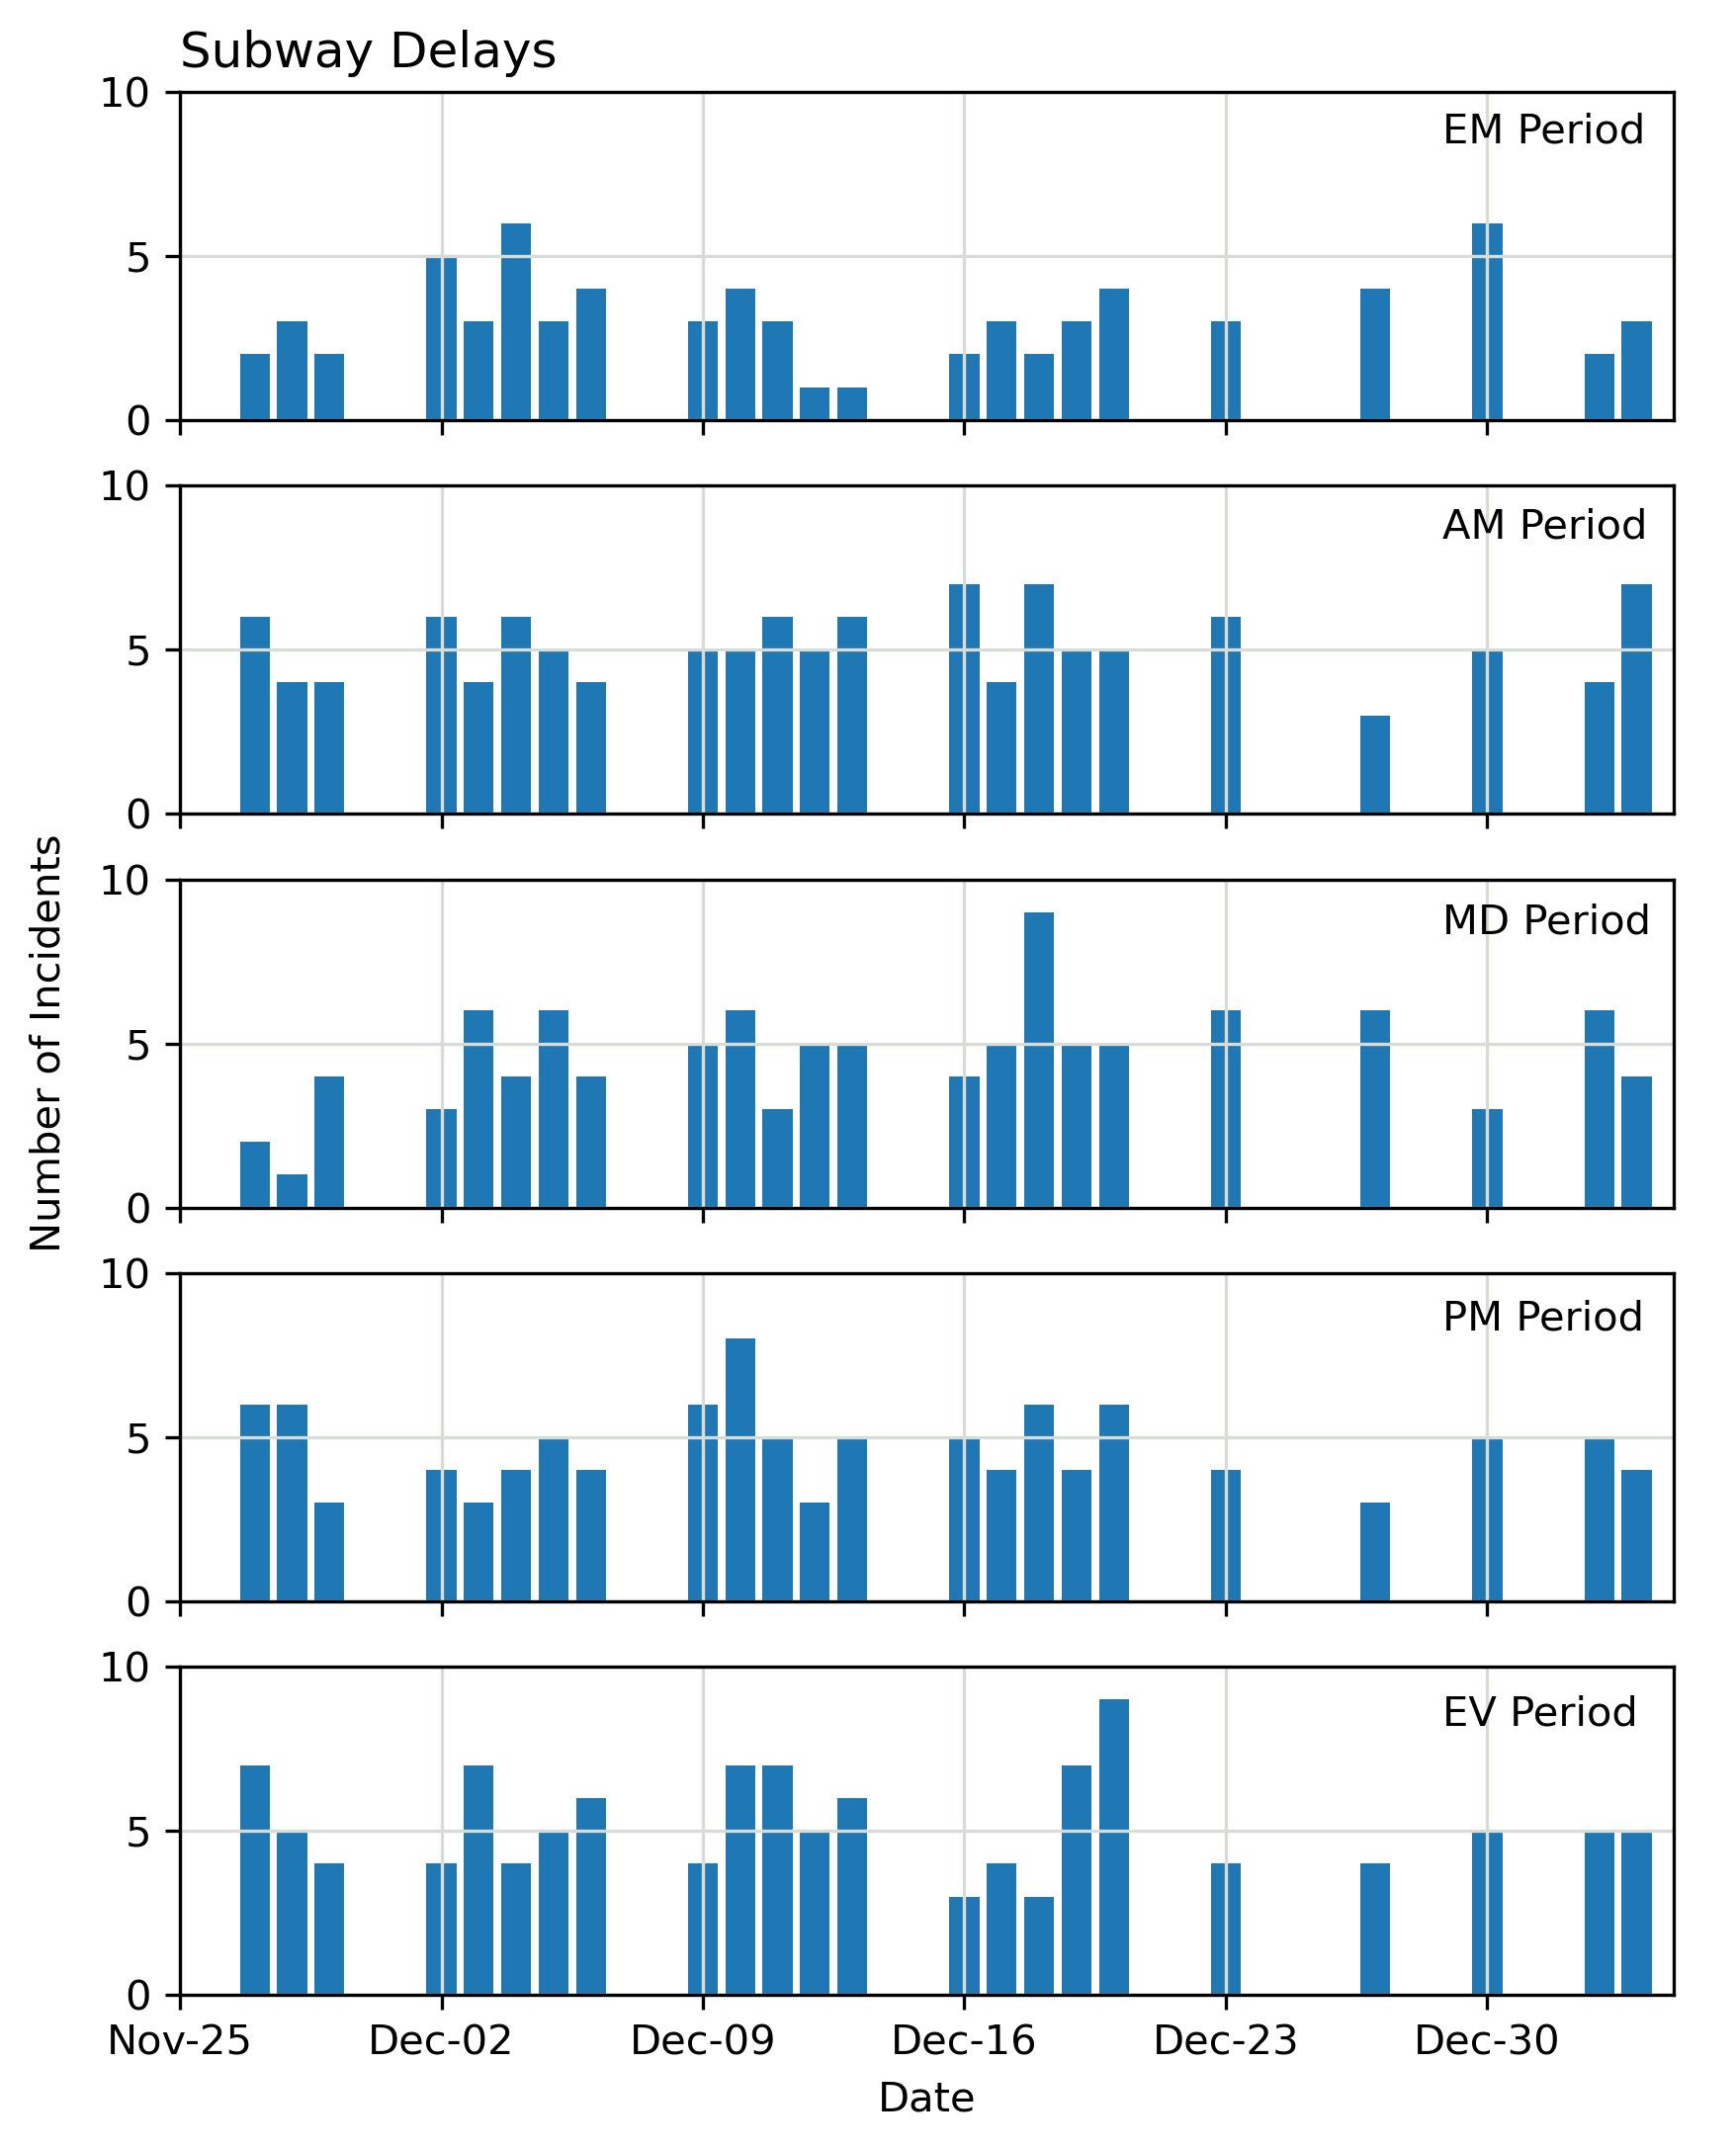

In [75]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = summary[summary['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['incidents'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    ax[i].set_ylim([0,10])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])


    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Subway Delays', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('subway-delay-count.png', dpi = 300, bbox_inches = "tight")

In [74]:
summary.to_csv('subway_delay_summary.csv', index = False)
cleaned.to_csv('subway_cleaned.csv', index = False)